# 00_CalibModule

## Sensor calibration

This notebook shows the basic steps to set up the sensor for the _open AR-Sandbox_. 
This not only involves tweaking of calibration parameters, but also the adjustment of your hardware components, like the motion sensing input device (e.g. Kinect) and the projector.

Let's start with importing the main modules:

- os-module:
This module provides a portable way of using operating system dependent functionality. For further information have a look at https://docs.python.org/3/library/os.html

- sys-module:
This module provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter. It is always available. For further information have a look at https://docs.python.org/3/library/sys.html 

In [1]:
''' Only useful when sandbox is not installed '''

import os,sys
sys.path.append('../../../')

from sandbox import _calibration_dir
from sandbox.sensor import Sensor, CalibSensor

c:\users\barbara\open_ar_sandbox\sandbox\sensor\kinectV1.py:7: UserWarning: Freenect module not found, KinectV1 will not work
  warn('Freenect module not found, KinectV1 will not work')


dependencies not found for KinectV2 to work. Check installation and try again


First we initialize the calibration module for the Kinect-sensor. At this point we need the calibration file of the projector since this module needs to project the sensor image in the projector.
This will open a panel server with the sensor image updating.

In [2]:
''' Set name = 'dummy' to continue without a motion sensing input device ''' 

calib_proj = _calibration_dir + 'my_projector_calibration.json'
module = CalibSensor(calibprojector = calib_proj, name = 'dummy')

DummySensor initialized.
JSON configuration loaded for projector.


Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!
Launching server at http://localhost:49245


Now we can open the widget box to start the calibration

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] WidgetBox
                [0] Markdown(str)
                [1] TextInput(name='Choose the projector c..., value='c:\\users\\barbara\\open_...)
                [2] Button(name='Load calibration')
                [3] Markdown(str)
                [4] IntSlider(bar_color='#084C61', end=424, name='Sensor top margin', start=1, value=10, value_throttled=10)
                [5] IntSlider(bar_color='#084C61', end=512, name='Sensor right margin', start=1, value=10, value_throttled=10)
                [6] IntSlider(bar_color='#084C61', end=424, name='Sensor bottom margin', start=1, value=10, value_throttled=10)
                [7] IntSlider(bar_color='#084C61', end=512, name='Sensor left margin', start=1, value=10, value_throttled=10)
                [8] VSpacer(height=5)
                [9] Markdown(str)
                [10] IntSlider(bar_color='#DBD053', end=2000, name='Vertical minimum', value=700, value_throttled=700)
                [11] IntSlider(bar_color='#DB3A34', end=2000, name='Vertical maximum', value=1500, value_throttled=1500)
                [12] Button(name='Refresh sensor f...)
            [1] Matplotlib(Figure, height=300)
    [1] Column
        [0] Markdown(str)
        [1] IntSlider(bar_color='#084C61', end=2000, name='width of sandbox in mm', start=1, value=1000, value_throttled=1000)
        [2] IntSlider(bar_color='#084C61', end=2000, name='height of sandbox in mm', start=1, value=800, value_throttled=800)
    [2] Column
        [0] Markdown(str)
        [1] TextInput(name='Choose a calibration f..., value='c:\\users\\barbara\\open_...)
        [2] Button(name='Save calibration')
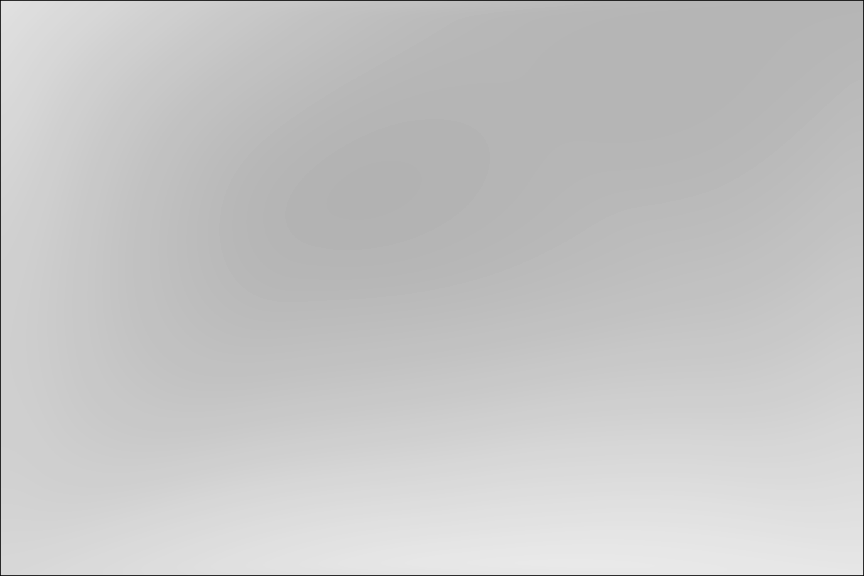

In [3]:
widget = module.calibrate_sensor()
widget

In [4]:
module.sensor.save_json(file=_calibration_dir+ 'my_sensor_calibration.json')

JSON configuration file saved: c:\users\barbara\open_ar_sandbox\sandbox/../notebooks/calibration_files/my_sensor_calibration.json


In [5]:
sensor = Sensor(calibsensor=_calibration_dir+ 'my_sensor_calibration.json')

JSON configuration loaded for sensor.


ImportError: Kinect v2 dependencies are not installed

Importing matplotlib.pyplot-library

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. For further information have a look at https://matplotlib.org/

In [ ]:
import matplotlib.pyplot as plt
plt.pcolormesh(sensor.get_frame())
plt.colorbar()
plt.show()
print(sensor.extent)